# Ejemplo para el cálculo de costes de reparacion en el grado de desarrollo de proyecto de inversión: Parte 3 - Representación de resultados y cálculo de costes

Este ejemplo continuará a partir de los datos guardados tras la verificación de la estrategia de reparación al final del apartado [Parte 2 - Verificación simultánea de todos los modos de fallo principales a lo largo de la vida útil.](co_costes_reparacion_02_es_c1.ipynb)

## Importación de paquetes de IPython

In [29]:
# hidden
import environment as env
env.initialize()

In [30]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [31]:
# Juypyter setup

%matplotlib inline
import os
import sys
import pickle
import ast
import pandas as pd
env.pandas_setup()
from IPython.display import HTML

In [32]:
sim_path = os.path.join(env.modules_path ,'AP_PI_reparacion_est_conservadora', 'datos', 'sim_01')

if sim_path not in sys.path:
    sys.path.append(sim_path)

## Carga de variables del apartado anterior

In [33]:
# Getting back the objects:
dir_data = os.path.join(env.data_path, 'reparacion', 'proyecto_inversion', 'var_co_costes_reparacion_01_pi.pkl')

with open(dir_data) as f:  # Python 3: open(..., 'rb')
    ruta_de, ruta_ds, alcance, estrategia, de_planta, de_esquema_division_dique, de_diagrama_modos, clima_tramos, cadencia, de_tipo_verificacion, de_verificacion_tramos, peralte, de_reparacion_necesarios, de_reparacion_disponibles, de_arbol_fallo = pickle.load(f)


# Getting back the objects:
dir_data = os.path.join(env.data_path, 'reparacion', 'proyecto_inversion', 'var_co_costes_reparacion_02_pi.pkl')

with open(dir_data) as f:  # Python 3: open(..., 'rb')
    datos_salida, averia_acum_estado, averia_estado, estado_modos_fallo, origen_maquinaria_reparacion_estado, origen_materiales_reparacion_estado, origen_mano_obra_reparacion_estado, datos_salida_prob_ini_averia = pickle.load(f)

## Importación de paquetes para el ejemplo

In [34]:
import matplotlib.pyplot as plt
from reparacion.calculos import calculo_final_simulacion
from reparacion.calculos import extraccion_resultados
from reparacion.calculos import calculo_costes

## Representación de los resultados de la simulación numérica

C:\Users\GDFA-JUAN\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


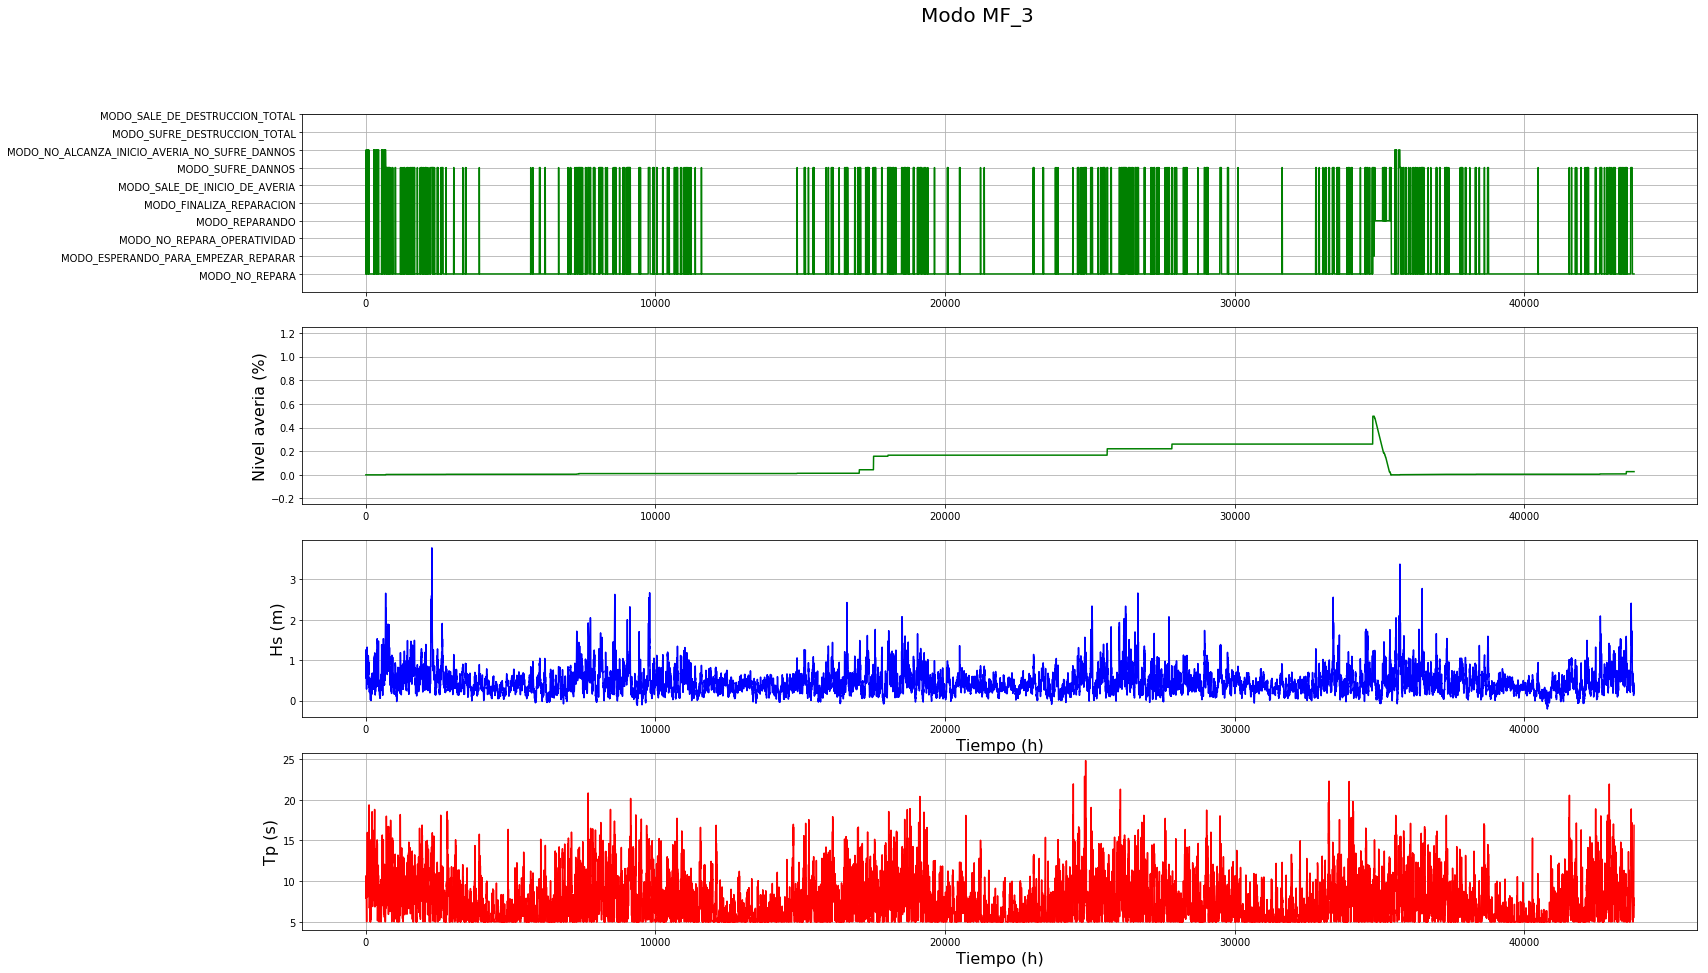

In [35]:
# Calculo de la hora final de simulacion
h_fin_sim = calculo_final_simulacion(de_planta, clima_tramos, cadencia)

# Representacion grafica
col = ['r', 'g', 'k', 'y', 'b', 'c', 'm', 'r', 'g', 'k', 'y', 'b', 'c', 'm', 'r', 'g', 'k', 'y', 'b', 'c']
display = ['MF_0', 'MF_1', 'MF_2', 'MF_3', 'MF_4', 'MF_5', 'MF_6', 'MF_7', 'MF_8', 'MF_9', 'MF_10', 'MF_11',
'MF_12', 'MF_13', 'MF_14', 'MF_15', 'MF_16', 'MF_17', 'MF_18', 'MF_19', 'MF_20']

cont = 1
for mst in de_esquema_division_dique.iterrows():
    plt.figure(figsize=(25, 15))

    # Obtencion del tramo, subsistema y modo de fallo
    mst = mst[1]
    tr = mst['tramo']
    ss = mst['subsistema']
    mf = mst['modo_fallo']

    plt.suptitle('Modo ' + str(mf), fontsize=20)

    #ax1 = plt.subplot(de_esquema_division_dique.shape[0], 1, cont)
    ax1 = plt.subplot(4, 1, 1)
    x = range(0, cadencia * h_fin_sim, cadencia)
    ax1.plot(x, estado_modos_fallo.loc[(tr, ss, mf), :], color=col[cont], label=display[cont])
    plt.grid()
    plt.ylim(-1, 9)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9], [
        'MODO_NO_REPARA', 'MODO_ESPERANDO_PARA_EMPEZAR_REPARAR', 'MODO_NO_REPARA_OPERATIVIDAD', 'MODO_REPARANDO',
        'MODO_FINALIZA_REPARACION', 'MODO_SALE_DE_INICIO_DE_AVERIA', 'MODO_SUFRE_DANNOS',
        'MODO_NO_ALCANZA_INICIO_AVERIA_NO_SUFRE_DANNOS', 'MODO_SUFRE_DESTRUCCION_TOTAL', 'MODO_SALE_DE_DESTRUCCION_TOTAL'])

    ax2 = plt.subplot(4, 1, 2, sharex=ax1)
    x = range(0, cadencia * h_fin_sim, cadencia)
    y = averia_acum_estado.loc[(tr, ss, mf), :]
    ax2.plot(x, y, color=col[cont], label=display[cont])
    plt.ylim(-0.25, 1.25)
    plt.grid()
    plt.ylabel('Nivel averia (%)', fontsize=16)

    ax3 = plt.subplot(4, 1, 3, sharex=ax1)
    x = range(0, cadencia * h_fin_sim, cadencia)
    hs = clima_tramos[tr].ix[0: h_fin_sim - 1, 'hs']
    ax3.plot(x, hs, color='b', label='Hs (m)')
    plt.grid()
    cont += 1
    plt.xlabel('Tiempo (h)', fontsize=16)
    plt.ylabel('Hs (m)', fontsize=16)

    ax4 = plt.subplot(4, 1, 4, sharex=ax1)
    x = range(0, cadencia * h_fin_sim, cadencia)
    tp = clima_tramos[tr].ix[0: h_fin_sim - 1, 'tp']
    ax4.plot(x, tp, color='r', label='Tp (s)')
    plt.grid()
    plt.xlabel('Tiempo (h)', fontsize=16)
    plt.ylabel('Tp (s)', fontsize=16)

    # Guardado de resultados
    name_fichero = ('Modo_' + str(mf) + '_estados.pdf')
    direct = os.path.join(ruta_ds, name_fichero)

    plt.savefig(direct)
    plt.show()

En esta figura se muestra en la fila el estado por el que pasa el modo de fallo en cada estado a lo largo de los 5 años de simulación. La segunda fila muestra el grado de avería acumulado del fallo estado a estado y las filas tercera y cuarta muestran la alura de ola y periodo en cada estado.

Se muestran a continuación las salidas gráficas de otras simulaciones realizadas

#### Simulación 10

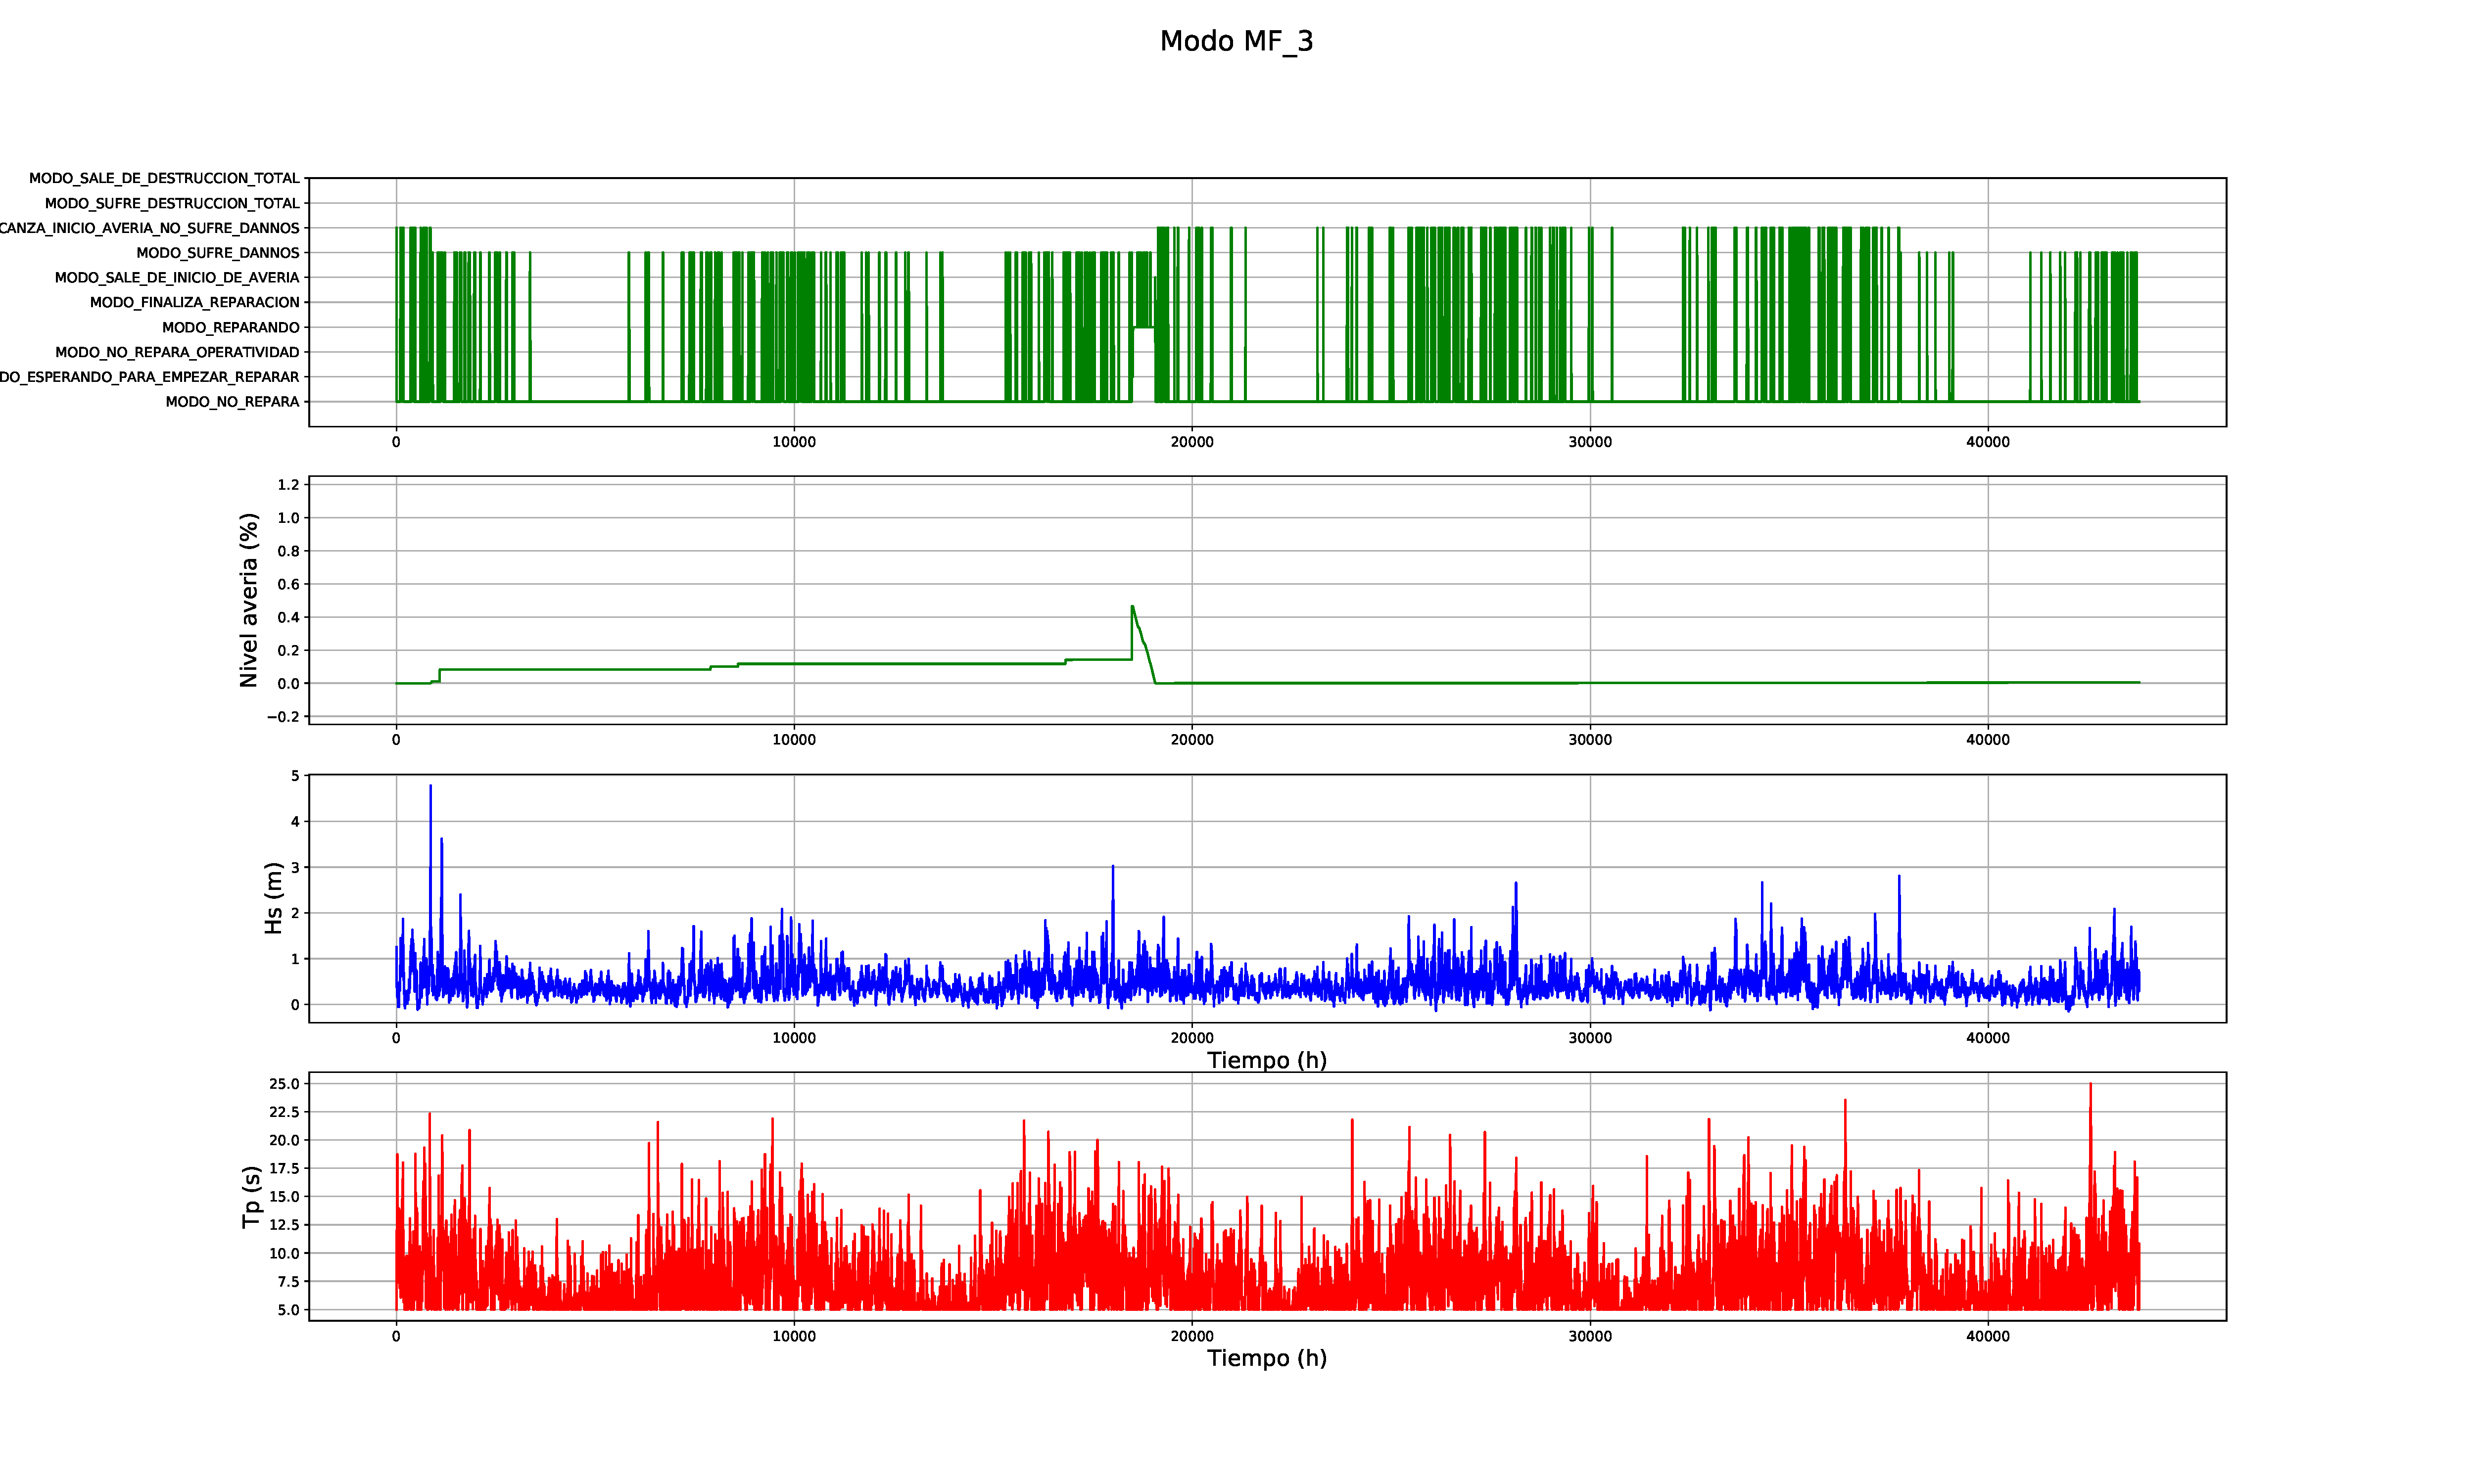

In [36]:
from IPython.display import Image
img_name = os.path.join(ruta_de, 'imagenes', 'Sim_10_Modo_MF_3_estados.png')
Image(filename=img_name, width=800)

#### Simulación 15

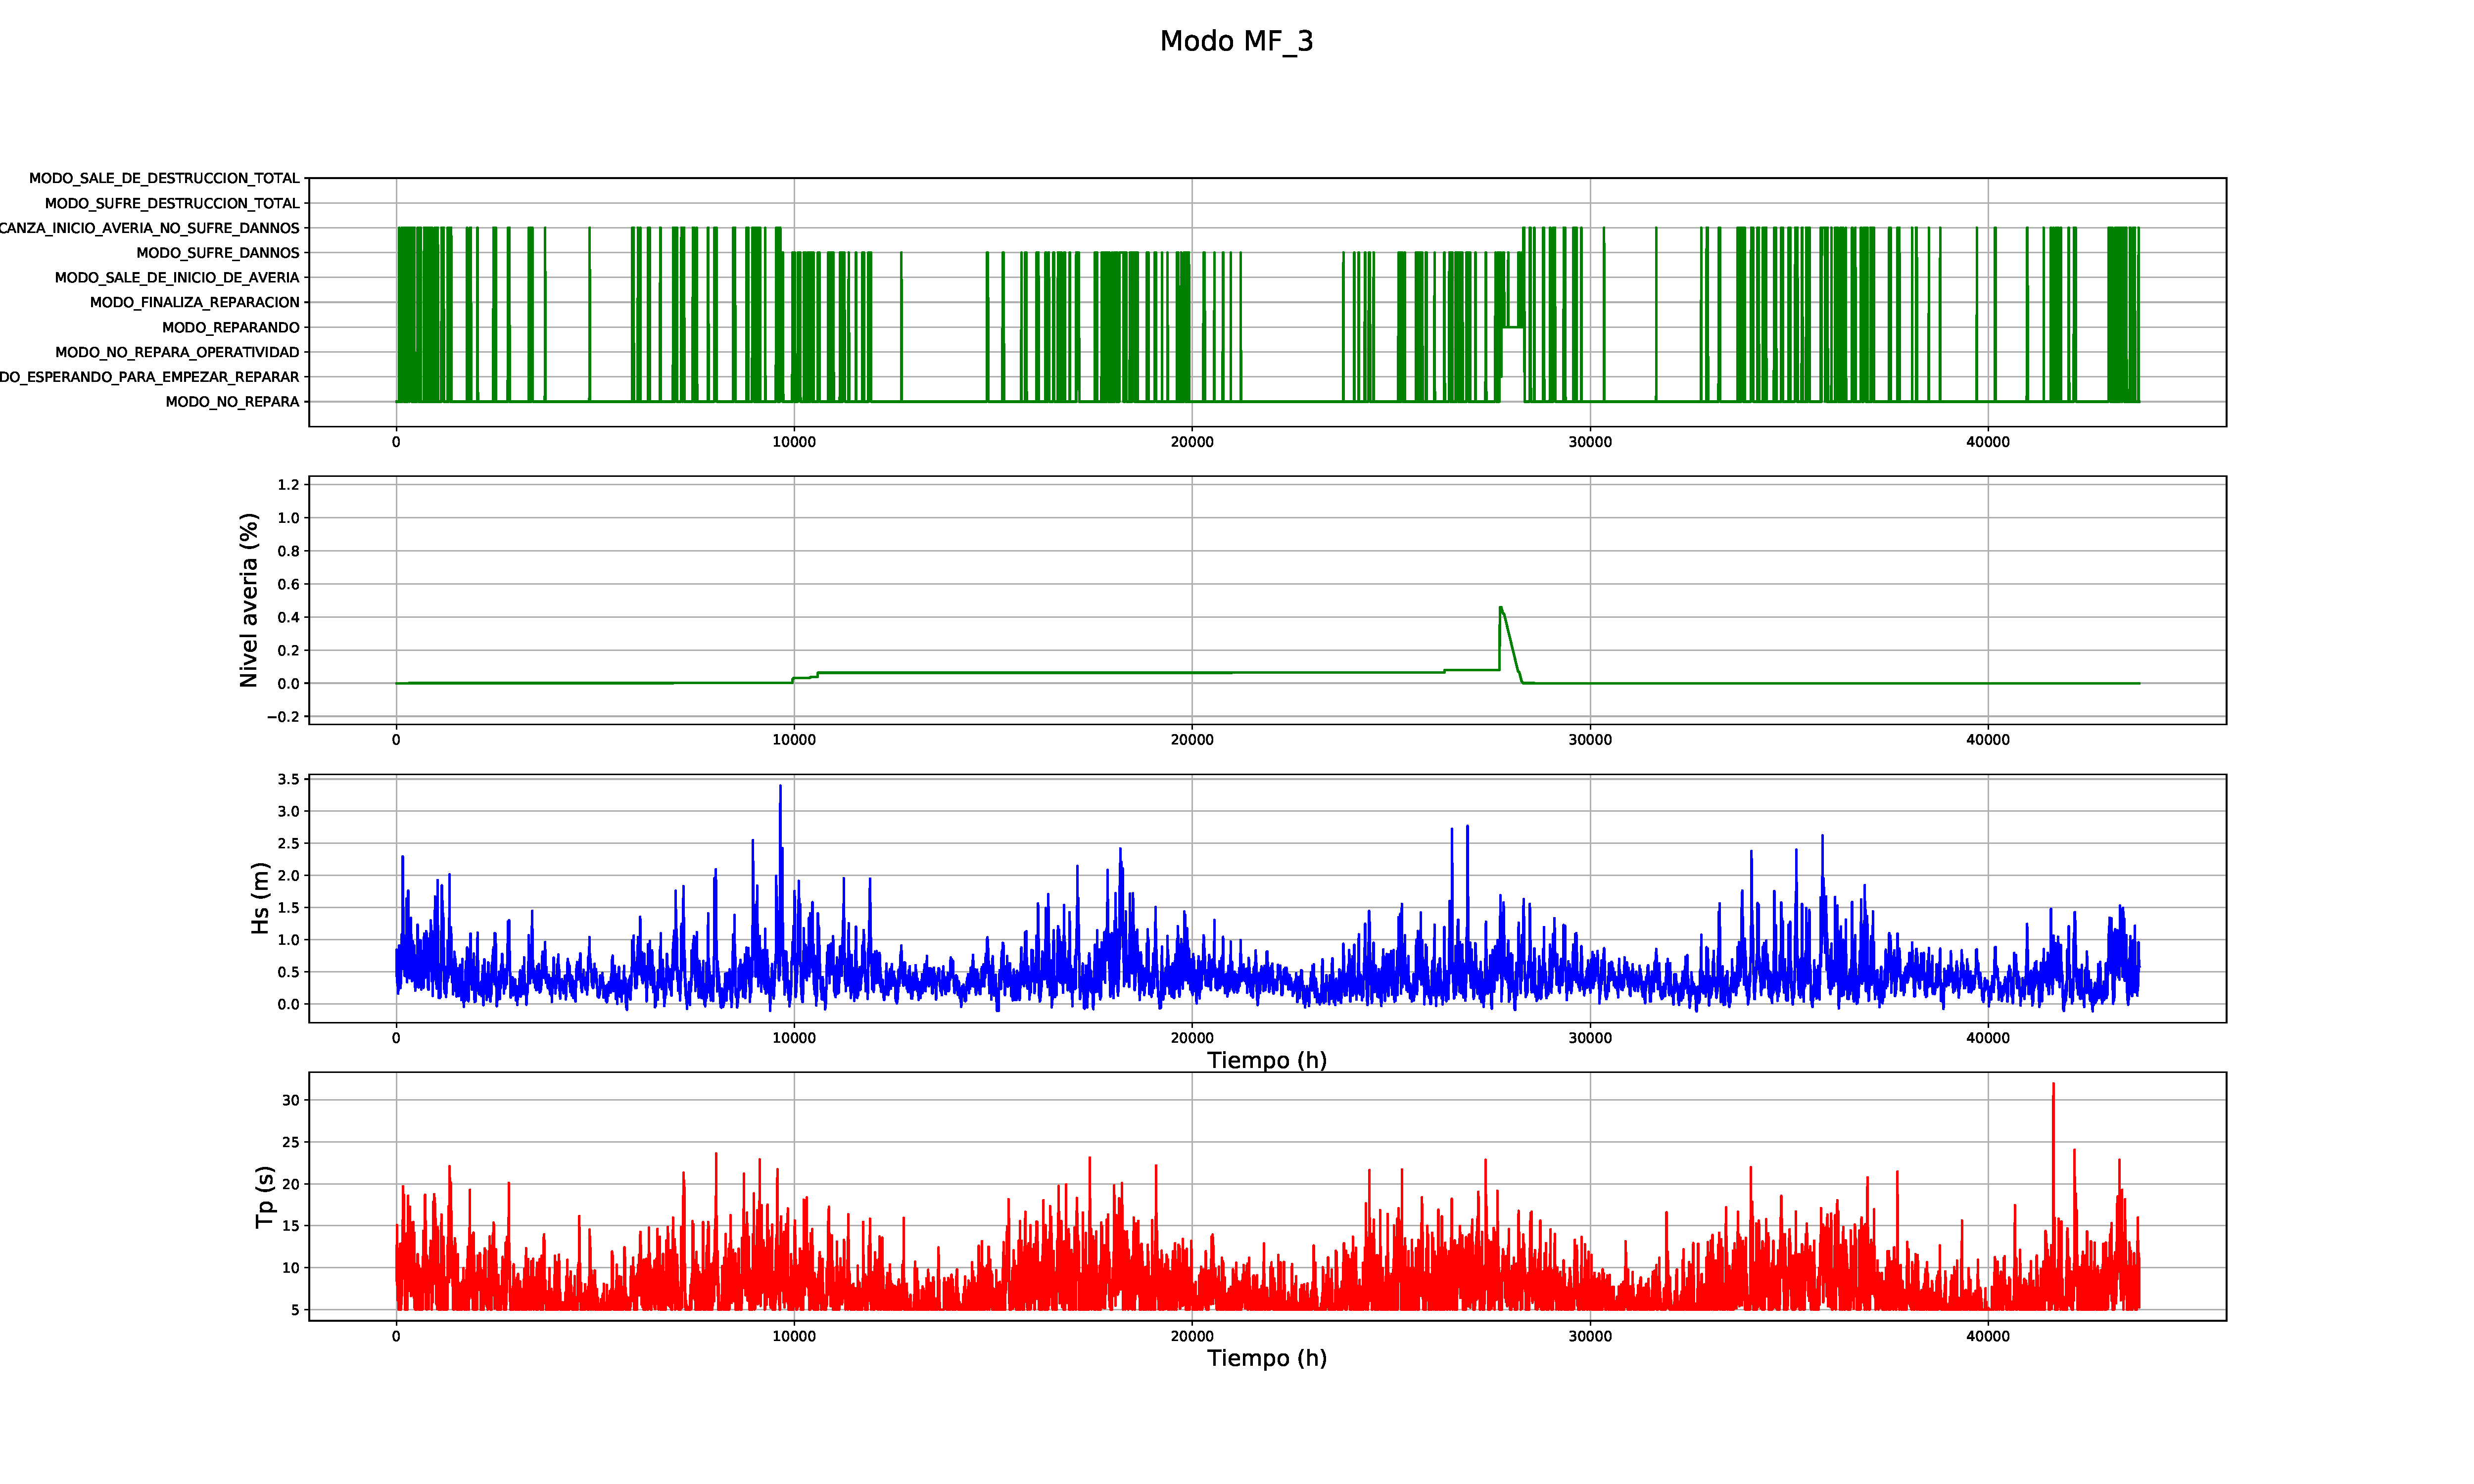

In [37]:
from IPython.display import Image
img_name = os.path.join(ruta_de, 'imagenes', 'Sim_15_Modo_MF_3_estados.png')
Image(filename=img_name, width=800)

#### Simulación 24

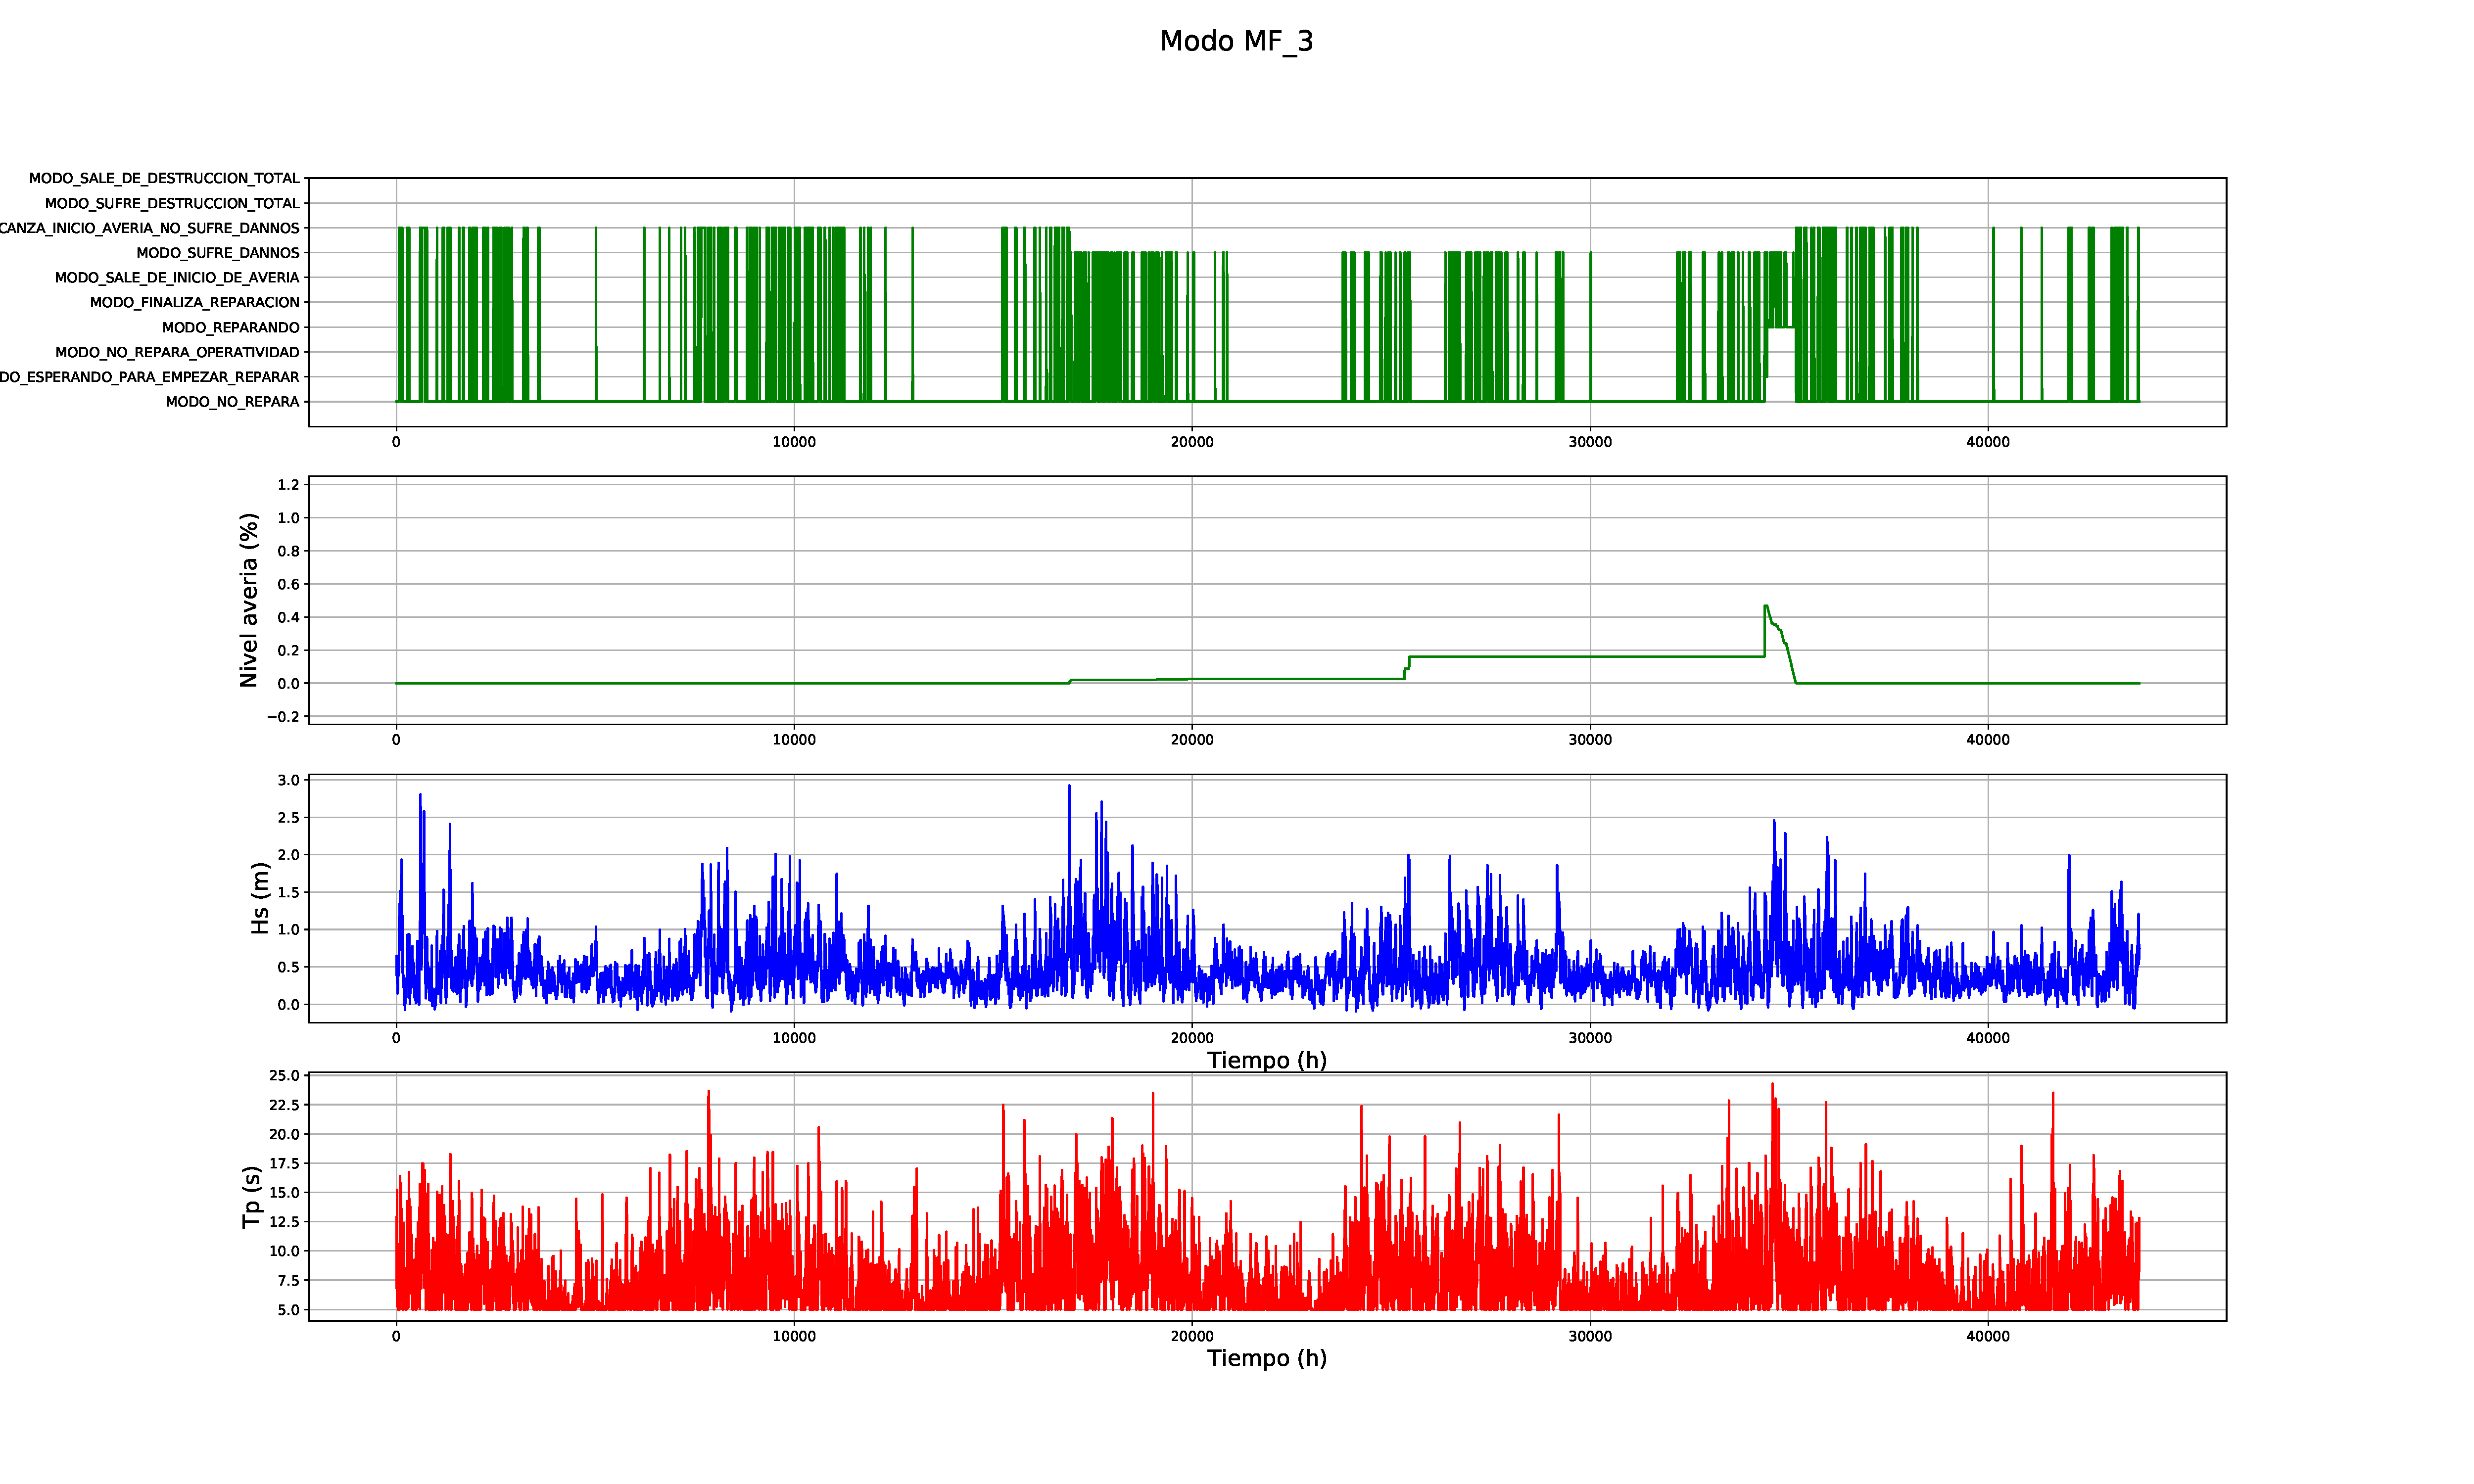

In [38]:
from IPython.display import Image
img_name = os.path.join(ruta_de, 'imagenes', 'Sim_24_Modo_MF_3_estados.png')
Image(filename=img_name, width=800)

## Extracción de resultados

In [39]:
(datos_salida) = extraccion_resultados(datos_salida, datos_salida_prob_ini_averia, de_planta,
                                       estado_modos_fallo, h_fin_sim, ruta_ds, cadencia)

## Cálculo de costes

In [40]:
(datos_salida_modos, datos_salida_total, datos_salida_ea_sencillo) = calculo_costes(estado_modos_fallo, de_reparacion_necesarios, de_reparacion_disponibles,
    datos_salida, de_planta, ruta_ds, alcance, estrategia, cadencia)

## Presentación de resultados

### Resultados de la verificación
Tras la verificación simultánea de los modos de fallo, la herramienta ofrece los siguientes resultados para cada componente de la obra de abrigo:
- Vida útil simulada
- Número de veces que se produce inicio de avería
- Probabilidad de inicio de avería
- Número de estados en los que se produce daño en el componente
- Número de veces que se inicia la reparación de la componente
- Probabilidad de que la componente sufra daños
- Duraciones mínima, media y máxima de los eventos de daño en la componente
- Duraciones mínima, media y máxima de espera para iniciar los trabajos de reparación una vez dada la orden
- Duraciones mínima, media y máxima de los trabajos de reparación
- Duraciones mínima, media y máxima de las paradas operativas

Se muestran a continuación los resultados ofrecidos por la herramienta para el modo de fallo $MF_3$

In [41]:
# Cambio el numero de filas y columnas que se muestran 
env.pandas_setup(50, 50)
datos_salida['datos_salida_modos']


vida_util  n_veces_ia  n_veces_dest_total   prob_ia  n_veces_danno  \
MF_3        5.0           2                   0  0.000046           1423   

      n_veces_ini_rep  prob_sufrir_danno  dur_media_danno  dur_max_danno  \
MF_3                1           0.032489         9.614865           75.0   

      dur_min_danno  dur_media_espera_rep  dur_max_espera_rep  \
MF_3            3.0                  12.0                15.0   

      dur_min_espera_rep  dur_media_rep  dur_max_rep  dur_min_rep  \
MF_3                 9.0      35.571429        261.0          3.0   

      dur_media_par_ope  dur_max_par_ope  dur_min_par_ope  
MF_3                0.0              0.0              0.0

### Resultados de la adjudicación de costes de reparación
Tras la adjudicación de costes, en este alcance la herramienta ofrece el valor del coste total de reparación para cada componente en euros:

Se muestran a continuación los resultados ofrecidos por la herramienta:

In [42]:
# Cambio el numero de filas y columnas que se muestran 
env.pandas_setup(50, 50)
datos_salida_modos

coste_reparacion_total_maquinaria  \
tr  ss   mf                                        
T_0 SS_0 MF_3                           428355.0   

               coste_reparacion_total_materiales  \
tr  ss   mf                                        
T_0 SS_0 MF_3                               3000   

               coste_reparacion_total_mano_obra  coste_reparacion_total  
tr  ss   mf                                                              
T_0 SS_0 MF_3                          225450.0                656805.0